In [1]:
import matplotlib.pyplot as plt
from keras.models import load_model, Model
import numpy as np
from utils.gradcam import GradCAM
from utils.vis import show_heatmap
import innvestigate.utils as iutils
import os
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [2]:
#changes the gpu
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
# this will be your trained model instead
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
model = VGG16(
    weights='imagenet',
)

In [4]:
# target layer is the layer you want to target
target_layer = "block5_pool" #vgg only
target_class = 0

In [5]:
partial_model = Model(
    inputs=model.inputs,
    outputs=iutils.keras.graph.pre_softmax_tensors(model.outputs),
    name=model.name,
)
partial_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [15]:
#select only one from your list
example_id = 0

# image folder
path = "data/images/"

In [47]:
# change this to load a list of images you want
orig_imgs = [img_to_array(load_img("data/images/example.jpg"))] 
input_imgs = np.copy(orig_imgs)
print(np.shape(input_imgs))

# preprocess input for model
input_imgs = preprocess_input(input_imgs) #for built in keras models

(1, 224, 224, 3)


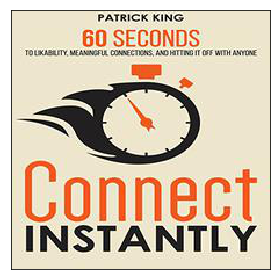

In [48]:
plt.imshow(orig_imgs[example_id].astype(int))
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [49]:
# optional
predictions = model.predict(input_imgs)
pred_id = np.argmax(predictions[example_id])
print("ground truth id:", target_class)
print("prediction id:", pred_id)

ground truth id: 0
prediction id: 916


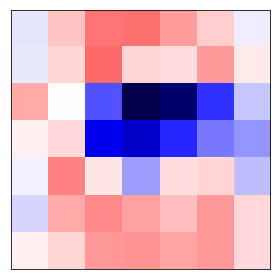

In [50]:
partial_gradcam_analyzer = GradCAM(
    model=partial_model,
    target_id=target_class,
    layer_name=target_layer,
)
analysis_partial_grad_cam = partial_gradcam_analyzer.analyze(input_imgs)
show_heatmap(analysis_partial_grad_cam[example_id].sum(axis=(2)))
plt.show()